In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

In [2]:
df = pd.read_csv("car_price_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [4]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


In [5]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
df['Car_age'] = 2020-df['Year']

#It's time to drop the Year column after the needed info is derived.
df.drop(labels='Year',axis=1,inplace=True)

In [8]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


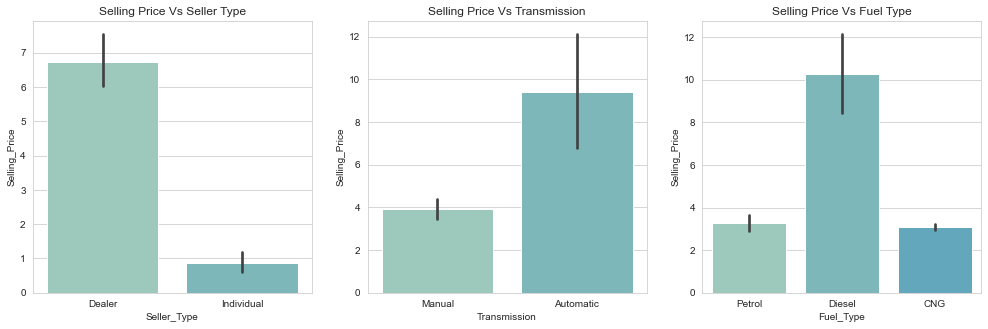

In [9]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Seller_Type'], df['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(df['Transmission'],df['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(df['Fuel_Type'],df['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

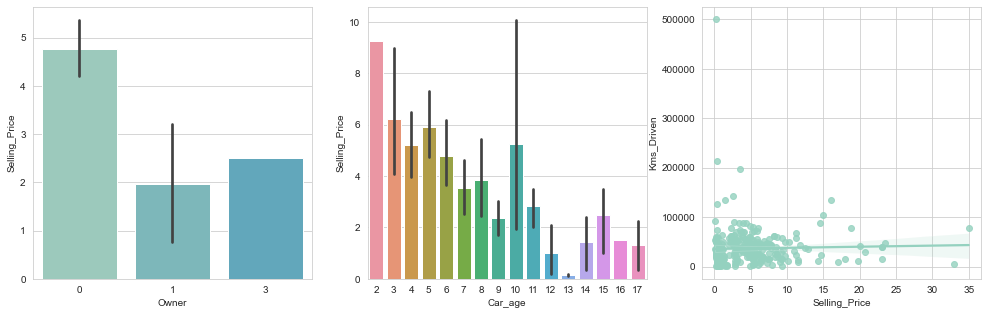

In [10]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Owner'],df['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(df['Car_age'],df['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(df['Selling_Price'],df['Kms_Driven'])
plt.show()

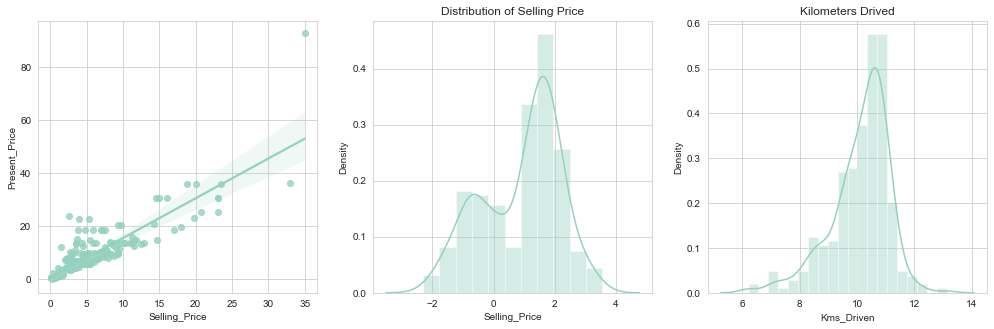

In [11]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df['Selling_Price'],df['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

In [12]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [13]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)

In [14]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.201728,Present_Price
1,2.892026,Kms_Driven
2,1.087990,Owner
3,8.540393,Car_age
4,4.714762,Fuel_Type_Diesel
5,13.341429,Fuel_Type_Petrol
6,2.230179,Seller_Type_Individual
7,8.368965,Transmission_Manual


In [16]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

In [17]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.456996,Present_Price
1,1.084141,Owner
2,4.810633,Car_age
3,1.658039,Fuel_Type_Diesel
4,1.864471,Seller_Type_Individual
5,3.964982,Transmission_Manual


<AxesSubplot:>

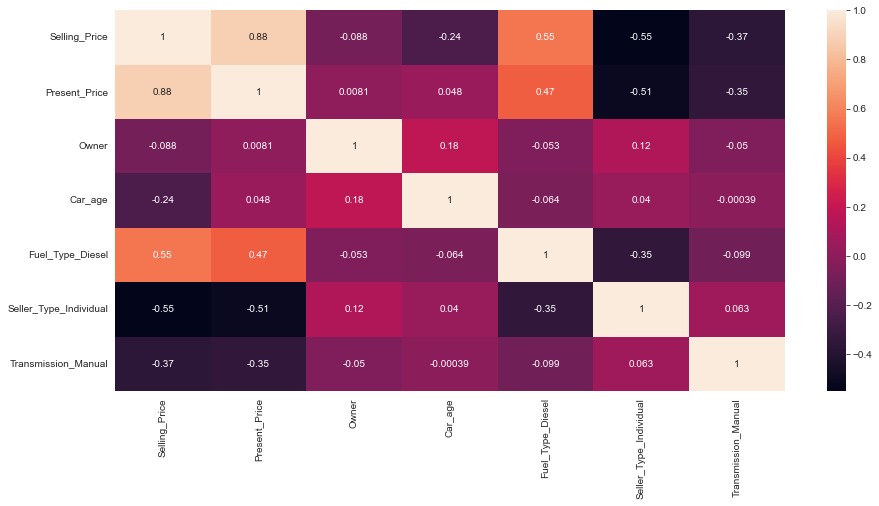

In [18]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [19]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [20]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_age', 'Fuel_Type_Diesel',
                              'Seller_Type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.126
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


<AxesSubplot:>

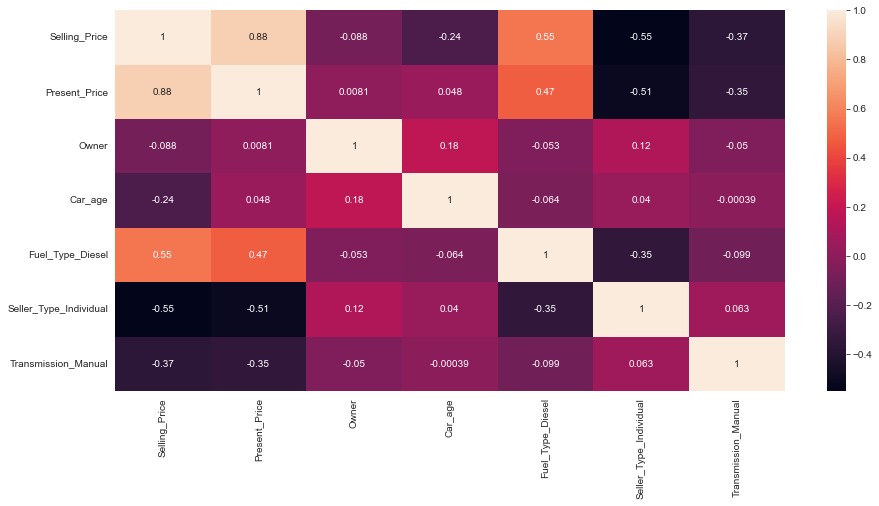

In [21]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [22]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [23]:
data_no_multicolinearity.columns

Index(['Selling_Price', 'Present_Price', 'Owner', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [24]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [25]:
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,6,0,0,1
1,4.75,9.54,7,1,0,1
2,7.25,9.85,3,0,0,1
3,2.85,4.15,9,0,0,1
4,4.60,6.87,6,1,0,1


In [26]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

StandardScaler()

In [27]:
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [28]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

In [30]:
# # Model Building
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

# # Training Model
# lr.fit(x_train,y_train)

# # Model Summary
# y_pred_lr = lr.predict(x_test)

# r_squared = r2_score(y_test,y_pred_lr)
# rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
# print("R_squared :",r_squared)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_1 = le.fit_transform(df['Fuel_Type'])
label_2 = le.fit_transform(df['Seller_Type'])
label_3 = le.fit_transform(df['Transmission'])

In [32]:
df.drop("Fuel_Type", axis=1, inplace=True)
df.drop("Seller_Type", axis=1, inplace=True)
df.drop("Transmission", axis=1, inplace=True)

df["Fuel_Type"] = label_1
df["Seller_Type"] = label_2
df["Transmission"] = label_3
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,6,2,0,1
1,4.75,9.54,43000,0,7,1,0,1
2,7.25,9.85,6900,0,3,2,0,1
3,2.85,4.15,5200,0,9,2,0,1
4,4.60,6.87,42450,0,6,1,0,1


In [33]:
# # Model Building
from sklearn.linear_model import LinearRegression
obj = linear_model.LinearRegression()
obj.fit(df[['Present_Price','Car_age','Fuel_Type','Seller_Type','Transmission']],df.Selling_Price)

LinearRegression()

In [34]:
obj.predict([[6, 6, 2, 0, 1]])

array([4.0345548])

In [35]:
import pickle
pickle.dump(obj , open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))